CLUSTERING

Importing fundamental libraries used in whole process.

In [0]:
import numpy as np
import pandas as pd
import random as rd

Import libraries for plotting.

In [0]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans #K-means library, only for determining the elbow method

DATA PROCESSING

Load the dataset from google drive, convert them to dataframe.

In [0]:
import requests
from io import StringIO

pd.set_option('mode.chained_assignment', None)
url = requests.get('https://bit.ly/used_cars_dataset')
csv_raw = StringIO(url.text)
df = pd.read_csv(csv_raw)
df.state.value_counts()

va    12951
wa     3427
vt     2965
ut      658
Name: state, dtype: int64

Separating the data model.

In [0]:
nums = ['lat', 'long']
df_used = df[nums]
df_used

,lat,long
0,40.7372,-111.858
1,40.5881,-111.884
2,40.5881,-111.884
3,40.5881,-111.884
4,40.3744,-104.694
...,...,...
19996,46.2348,-119.128
19997,46.5642,-120.496
19998,46.0783,-118.293
19999,46.5642,-120.496


Handle missing values.

In [0]:
for num in nums:
     df_used[num] = df_used[num].fillna(df_used[num].mean())

K-Means Algorithm

In [0]:
def kmeans_func(dataset):
    # Used dataset for the algorithm
    df_arr =  np.array(dataset) 

    # Number of iterations, features, instances, and K
    num_instances,num_features = dataset.shape  
    iterations = 10
    num_K = 5
  
    # Declaring empty space for centroids and plot points.
    centroids = np.array([]).reshape(num_features,0)
    plotting_points = {}

    # Generating random centroids
    for i in range(num_K):
        centroids = np.c_[centroids,df_arr[rd.randint(0,num_instances)]]

    for i in range(iterations):
        euclid = np.array([]).reshape(num_instances,0)

        # Calculate euclid distances.
        for k in range(num_K):
            euclid = np.c_[euclid,np.sqrt(np.sum((df_arr-centroids[:,k])**2,axis=1))]
        belong_to = np.argmin(euclid, axis=1)+1

        # Reserving point array to null.
        points = {}
        for i in range(num_K):
            points[i+1] = np.array([]).reshape(2,0)     

        # Saving the point with the cluster it belongs to
        for j in range(num_instances):
            points[belong_to[j]] = np.c_[points[belong_to[j]],df_arr[j]]

        # Calculate mean for the next centroid
        for k in range(num_K):
            points[k+1] = np.transpose(points[k+1])
            centroids[:,k] = np.mean(points[k+1],axis=0)

        # Save the points and with the cluster it belongs to
        plotting_points = points

    return plotting_points,centroids

Model 1 : K-Means Clustering without scaling the data

In [0]:
df_nonscaled = df_used
df_nonscaled.head()

,lat,long
0,40.7372,-111.858
1,40.5881,-111.884
2,40.5881,-111.884
3,40.5881,-111.884
4,40.3744,-104.694


Elbow method to determine the best k cluster.

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f8175d4c2e8>,
                 k=None, metric=None, model=None, timings=True)

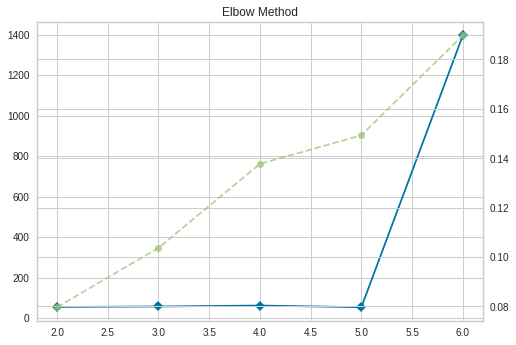

In [0]:
plt.title('Elbow Method')
KElbowVisualizer(KMeans(), k=(2,7)).fit(df_nonscaled)

Plot unclustered data.

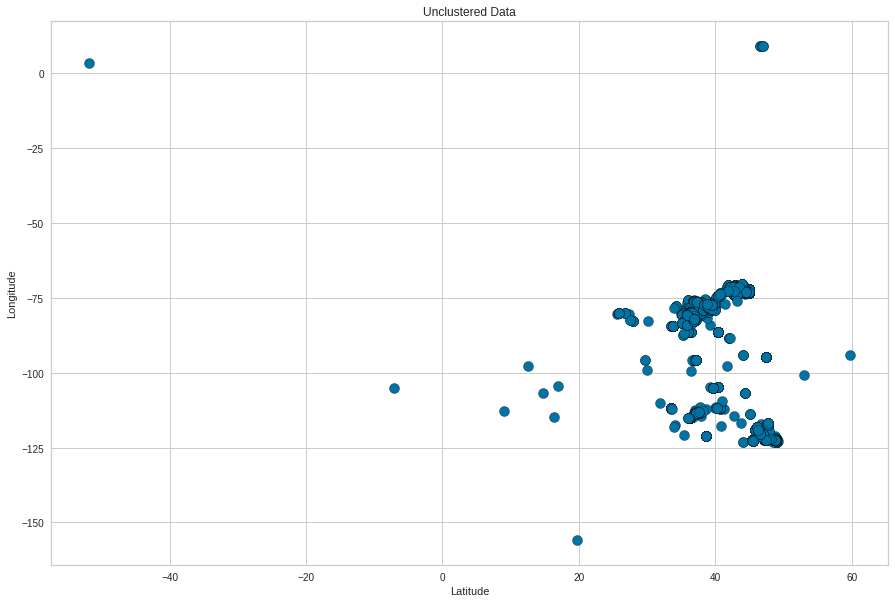

In [0]:
# Unclustered Data
plt.figure(figsize=(15,10))
plt.title('Unclustered Data')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.scatter(df_nonscaled.lat, df_nonscaled.long,s=100,alpha=1,edgecolors='black')

CLUSTERING

In [0]:
plot_nonscaled,centroids_nonscaled = kmeans_func(df_nonscaled)

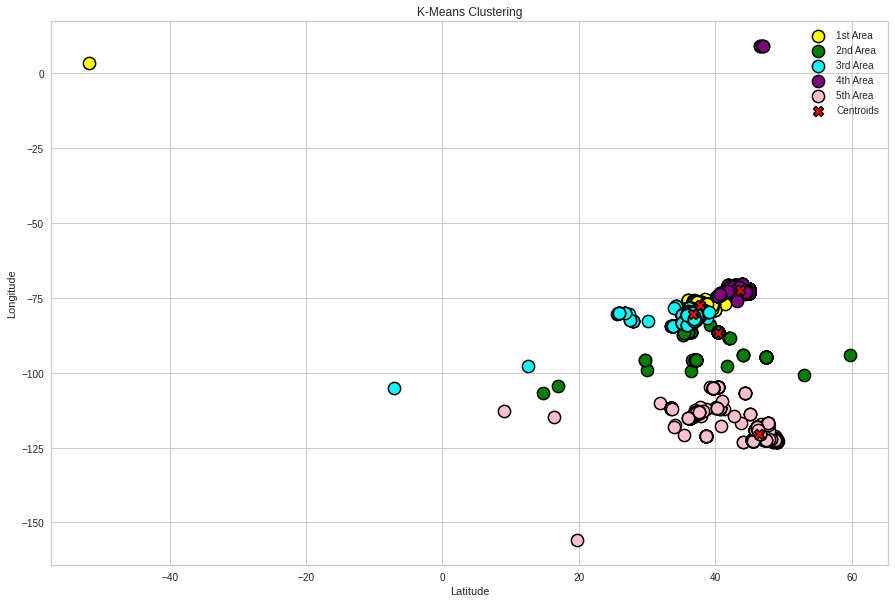

In [0]:
# Clustered Data
color=['yellow','green','cyan','purple','pink'] 
labels=['1st Area','2nd Area','3rd Area','4th Area','5th Area',]
plt.figure(figsize=(15,10))
for k in range(num_K):
    plt.scatter(plot_nonscaled[k+1][:,0],plot_nonscaled[k+1][:,1],s=150,c=color[k],
                label=labels[k],edgecolors='black',linewidth='1.5')

plt.scatter(centroids_nonscaled[0,:],centroids_nonscaled[1,:],s=100,c='red',marker='X',
            label='Centroids',edgecolors='black',linewidth='1.5')

plt.title('K-Means Clustering')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.legend()
plt.show()

Model 2 K-Means Clustering with scaling the data


Scaling the data

In [0]:
def data_scaler(datas):
   np_data = np.asarray(datas)
   z_scores = (np_data - np_data.mean()) / np_data.std()
   scaled_data = (np_data - np_data.min()) / (np_data.max() - np_data.min())
   return scaled_data

In [0]:
df_scaled = df_used
for column in df_scaled.columns:
    df_scaled[column] = data_scaler(df_scaled[column])

df_scaled.head()

,lat,long
0,0.829602,0.266933
1,0.828265,0.266775
2,0.828265,0.266775
3,0.828265,0.266775
4,0.826350,0.310352


Determining k cluster by using elbow method, this is done by k-means library.

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f81757b1860>,
                 k=None, metric=None, model=None, timings=True)

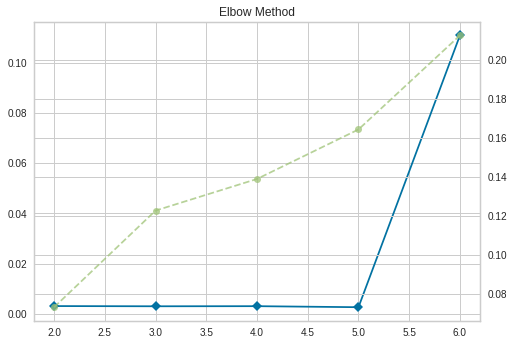

In [0]:
plt.title('Elbow Method')
KElbowVisualizer(KMeans(), k=(2,7)).fit(df_scaled)

Plot unclustered data.

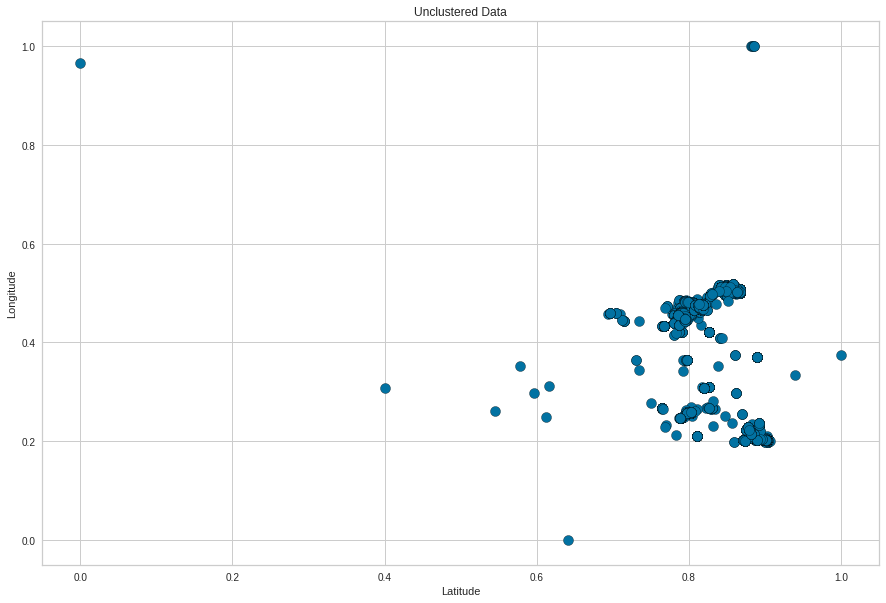

In [0]:
# Unclustered Data
plt.figure(figsize=(15,10))
plt.title('Unclustered Data')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.scatter(df_scaled.lat, df_scaled.long,s=100,alpha=1,edgecolors='black')


Clustering

In [0]:
plot_scaled,centroids_scaled = kmeans_func(df_scaled)

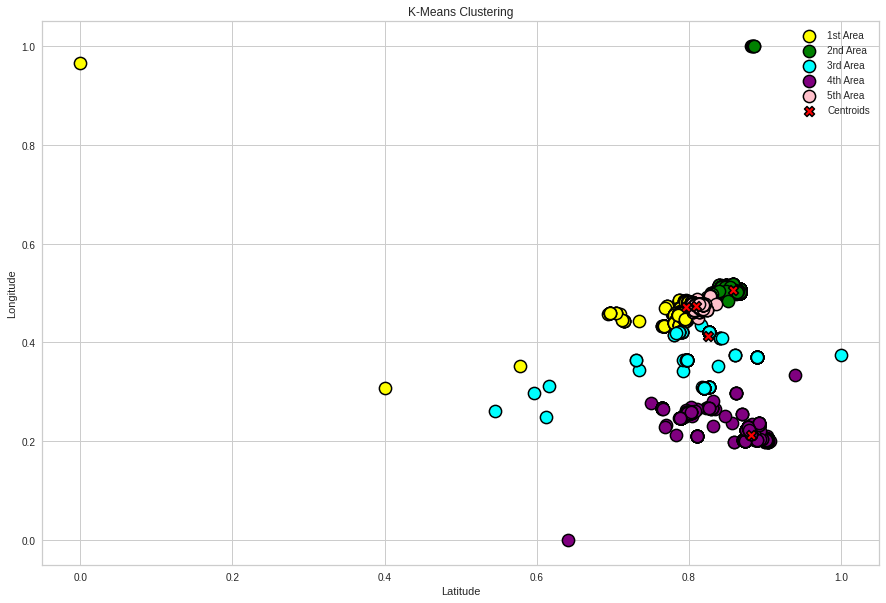

In [0]:
# Clustered Data
color=['yellow','green','cyan','purple','pink'] 
labels=['1st Area','2nd Area','3rd Area','4th Area','5th Area',]
plt.figure(figsize=(15,10))
for k in range(num_K):
    plt.scatter(plot_scaled[k+1][:,0],plot_scaled[k+1][:,1],s=150,c=color[k],
                label=labels[k],edgecolors='black',linewidth='1.5')

plt.scatter(centroids_scaled[0,:],centroids_scaled[1,:],s=100,c='red',marker='X',
            label='Centroids',edgecolors='black',linewidth='1.5')

plt.title('K-Means Clustering')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.legend()
plt.show()

Model 2 : K-Means Clustering with data scaling